## Transfer Learning Inception V3 using Keras

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(inception.output)
"""
x = Dense(2048, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
"""
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 90 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 33 images belonging to 3 classes.


In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
    callbacks=[early_stop]
)

C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
6/6 [==============================] - 36s 4s/step - loss: 14.8592 - accuracy: 0.3962 - val_loss: 9.5587 - val_accuracy: 0.3030
Epoch 2/100
6/6 [==============================] - 20s 3s/step - loss: 25.5721 - accuracy: 0.3653 - val_loss: 12.6243 - val_accuracy: 0.3030
Epoch 3/100
6/6 [==============================] - 20s 3s/step - loss: 32.4880 - accuracy: 0.3990 - val_loss: 12.1198 - val_accuracy: 0.3030
Epoch 4/100
6/6 [==============================] - 18s 3s/step - loss: 22.1947 - accuracy: 0.4850 - val_loss: 7.0706 - val_accuracy: 0.3333
Epoch 5/100
6/6 [==============================] - 20s 3s/step - loss: 20.3765 - accuracy: 0.4118 - val_loss: 6.0675 - val_accuracy: 0.3333
Epoch 6/100
6/6 [==============================] - 19s 3s/step - loss: 13.5774 - accuracy: 0.4513 - val_loss: 5.2128 - val_accuracy: 0.3333
Epoch 7/100
6/6 [==============================] - 18s 3s/step - loss: 8.4296 - accuracy: 0.5270 - val_loss: 4.9554 - val_accuracy: 0.3636
Epoch 8/100
6/6 [==

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [15]:
import matplotlib.pyplot as plt

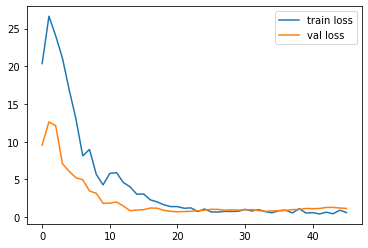

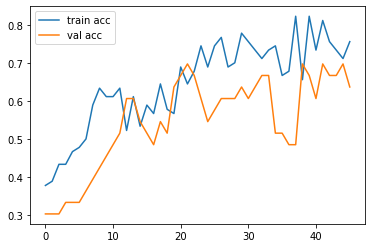

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [18]:

y_pred = model.predict(test_set)


In [19]:
y_pred

array([[2.9148892e-01, 4.0654638e-01, 3.0196467e-01],
       [2.2972161e-01, 6.3337201e-01, 1.3690640e-01],
       [9.6888047e-01, 3.0699702e-02, 4.1985020e-04],
       [8.5129388e-02, 8.9461720e-01, 2.0253355e-02],
       [7.0826754e-02, 9.1483051e-01, 1.4342770e-02],
       [2.2462124e-01, 5.0296038e-01, 2.7241838e-01],
       [1.2666966e-01, 6.7977357e-01, 1.9355679e-01],
       [1.1000219e-03, 2.4516230e-02, 9.7438377e-01],
       [5.1030811e-02, 9.3861103e-01, 1.0358224e-02],
       [3.2256192e-01, 3.5730934e-01, 3.2012868e-01],
       [9.9882811e-01, 1.1708735e-03, 9.6992051e-07],
       [9.1784817e-01, 7.5488195e-02, 6.6636060e-03],
       [1.5951621e-03, 9.9833220e-01, 7.2598275e-05],
       [5.9420466e-01, 3.9723375e-01, 8.5615581e-03],
       [5.8627313e-01, 2.7813661e-01, 1.3559027e-01],
       [3.2256192e-01, 3.5730934e-01, 3.2012868e-01],
       [8.4608514e-04, 1.7130636e-02, 9.8202330e-01],
       [1.5773359e-01, 2.9567909e-01, 5.4658735e-01],
       [9.2545497e-01, 6.704

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0], dtype=int64)

In [22]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_set.classes,y_pred))
print(confusion_matrix(test_set.classes,y_pred))

              precision    recall  f1-score   support

           0       0.09      0.10      0.10        10
           1       0.12      0.20      0.15        10
           2       0.40      0.15      0.22        13

    accuracy                           0.15        33
   macro avg       0.20      0.15      0.16        33
weighted avg       0.22      0.15      0.16        33

[[1 8 1]
 [6 2 2]
 [4 7 2]]


In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('datasets/rice_brown_leaf.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

In [25]:
result

array([[0., 0., 1.]], dtype=float32)

In [26]:
def correctclass(result):
    result = np.argmax(result, axis=1)
    if result[0] == 0:
        prediction = 'Bacterial leaf blight'
    elif result[0] == 1:
        prediction = 'Brown spot'
    else:
        prediction = 'Leaf smut'
    return prediction

In [27]:
print(correctclass(result))

Leaf smut


In [28]:
test_image = image.load_img('datasets/rice_Leaf_smut.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [29]:
result

array([[0.000000e+00, 4.182965e-27, 1.000000e+00]], dtype=float32)

In [30]:
print(correctclass(result))

Leaf smut


In [31]:
test_image = image.load_img('datasets/rice_Leaf_smut1.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

array([[0.000000e+00, 9.445977e-25, 1.000000e+00]], dtype=float32)

In [32]:
print(correctclass(result))

Leaf smut


In [33]:
test_image = image.load_img('datasets/rice_Bacterial-leaf-blight.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

array([[0., 0., 1.]], dtype=float32)

In [34]:
print(correctclass(result))

Leaf smut
